## Basic Simple Linear Regression Project

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
## Read the datasets
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


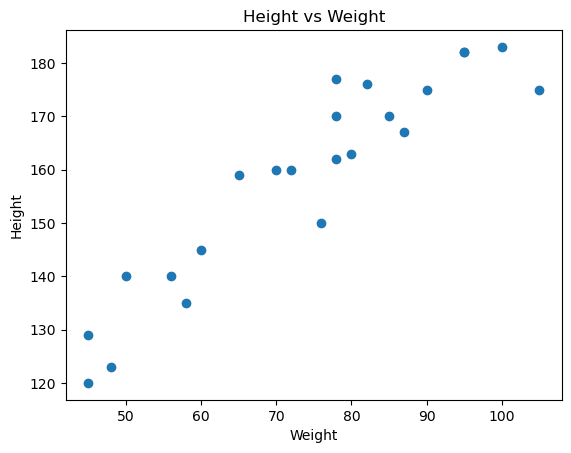

In [84]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

### While we train a machine learning algorithms, we follow the below steps:
1. Divide the feature based on independent and dependent features.
2. Train test split of the dataset
3. Standardize the dataset
4. Train the model using Linear Regression Algorithm

In [85]:
## Divide our dataset into dependent and independent features
X = df[['Weight']]  # Independent feature
y = df['Height']    # Dependent feature

In [86]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [87]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [88]:
# Train test split of the dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train => # Training data independent features
# X_test  => # Testing data independent features
# y_train => # Training data dependent features
# y_test  => # Testing data dependent features
# test_size => # Percentage of data to be used for testing
# Example : If we have 23 rows of data and test_size=0.2 then ~5 rows will be used for testing and ~18 rows will be used for training
# Random_state => # It is used to ensure that the split of data is reproducible.

In [90]:
X.shape

(23, 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# That means 80% of data is used for training and 20% of data is used for testing.
# We have total 23 rows of data, 18 rows are used for training and 5 rows are used for testing.

((18, 1), (5, 1), (18,), (5,))

In [92]:
## Standardization the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [93]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Here we are using StandardScaler to standardize the independent features of both training and testing datasets.
# fit_transform() is used on training data to fit the scaler and transform the data.
# transform() is used on testing data to transform the data using the same scaler fitted on training data.
# Because we want to apply the same scaling to both training and testing data.
# Explain why ? Data leakage : If we fit the scaler on testing data, it may lead to data leakage because the scaler will learn from the testing data which should be unseen during training.

In [94]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [95]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

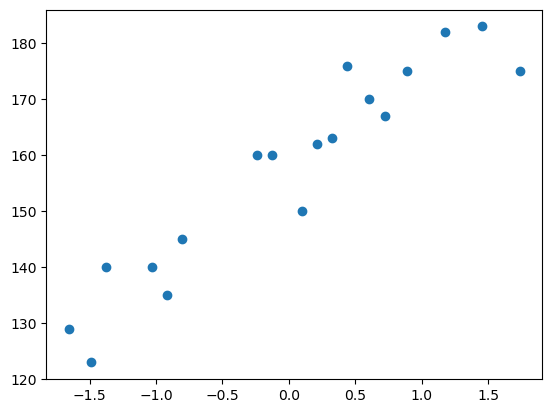

In [96]:
plt.scatter(X_train, y_train)

In [97]:
## Train the simple Linear Regression Model
# Because we are predicting a continuous value (Height) based on another continuous value (Weight), we will use Simple Linear Regression algorithm.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [98]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
print('The slope or coefficient of weight is :', regressor.coef_)
print('The intercept of the model is :', regressor.intercept_)

The slope or coefficient of weight is : [17.03440872]
The intercept of the model is : 157.5


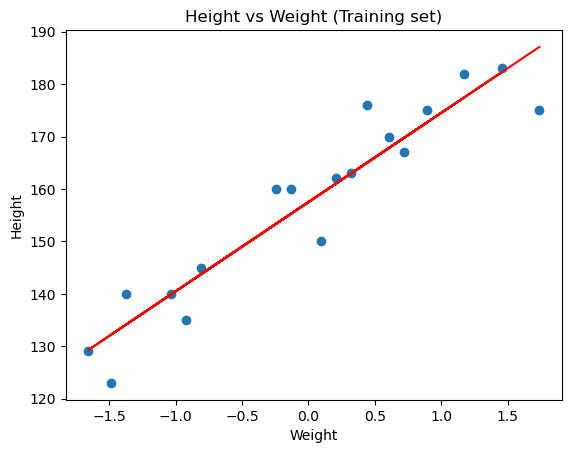

In [100]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight (Training set)')
plt.show()

### Prediction of train data
1. predicted height output = intercept + coef_(weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### Prediction of test data
1. predicted height output = intercept + coef_(weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [101]:
y_pred_test = regressor.predict(X_test)

In [102]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

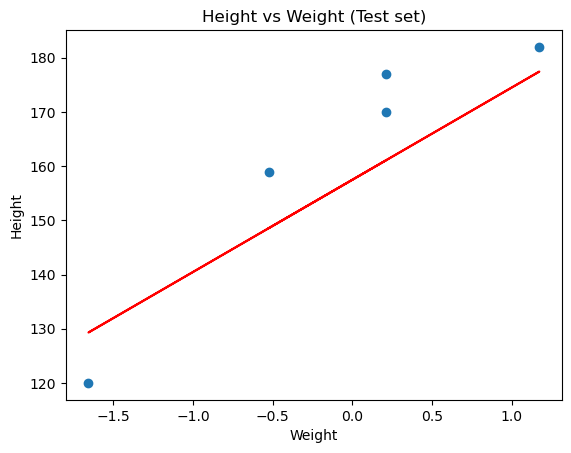

In [103]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight (Test set)')
plt.show()

## Performance Metrics

### MSE, MAE, RMSE

### R squared and Adjusted R squared

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 109.77592599051664
Mean Absolute Error (MAE): 9.822657814519232
Root Mean Squared Error (RMSE): 10.477400726827081


In [106]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [107]:
score

0.776986986042344

In [108]:
## display adjusted R-squared
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7026493147231252

In [109]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## New deta point weight is 80

df_new = pd.DataFrame([[80]], columns=['Weight'])
scaled_weight = scalar.transform(df_new)
scaled_weight

c:\Users\KIIT0001\anaconda3\envs\ai_ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [111]:
print('The height prediction for weight 80kg is: ',regressor.predict(scaled_weight))

The height prediction for weight 80kg is:  [163.01076266]


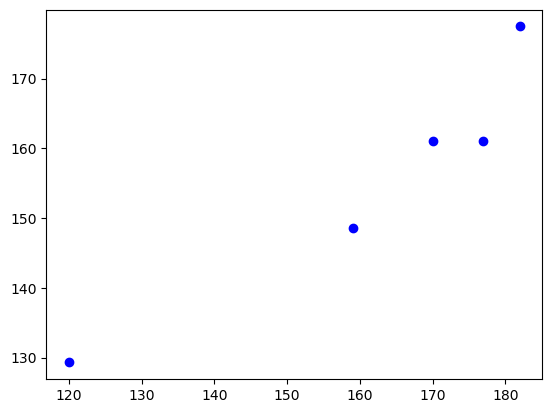

In [112]:
## Assumptions
## Plot a catter for the predictions
plt.scatter(y_test, y_pred_test, color='blue', label='Actual Data')

In [115]:
## Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_3040\1106211598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

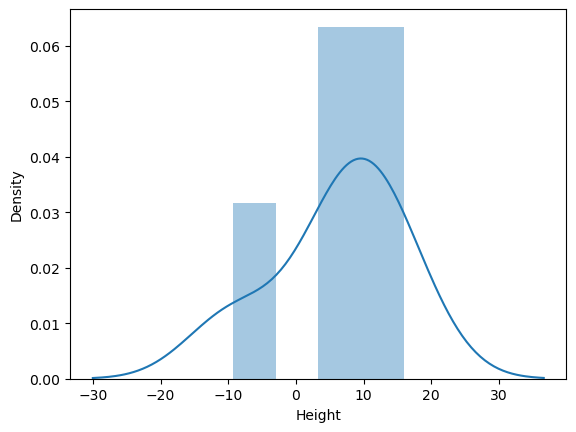

In [ ]:
## plot this residuals
import seaborn as sns
sns.histplot(residuals, kde=True)

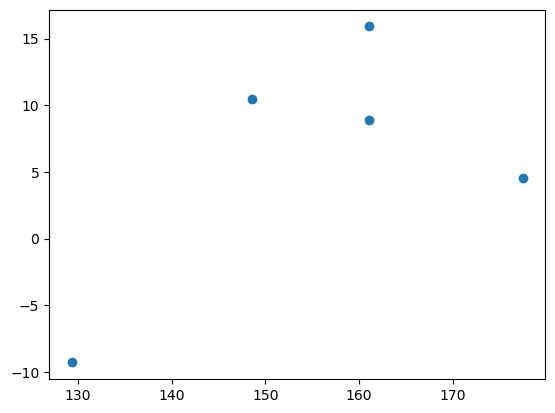

In [117]:
## Scatter plot with respect to predict and residuals
## uniform distribution
plt.scatter(y_pred_test, residuals)